# 데이터 전처리

## 0.환경준비

### 0.1 Import

In [53]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Data Loading

In [61]:
# titanic
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv'
titanic = pd.read_csv(path, usecols = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [62]:
# airquality
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv'
air = pd.read_csv(path)
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


## 1.전처리

### 1) 데이터 분할

* x, y 분할하기

In [63]:
target = 'Survived'
x = titanic.drop(target, axis = 1)
y = titanic.loc[:, target]

* train, validation, test 분할은 머신러닝 과정에서 다룹니다.

### 2) NaN 조치

#### ① 결측치 확인

In [64]:
x.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

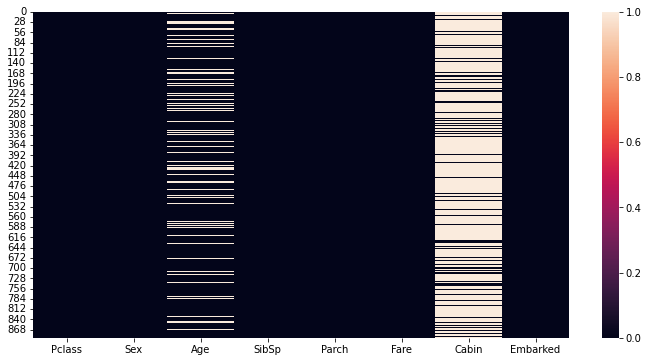

In [6]:
plt.figure(figsize = (12,6))
sns.heatmap(x.isna())
plt.show()

#### ② 결측치 제거

In [7]:
temp = x.copy()

In [42]:
temp.shape

(891, 8)

* 행 제거

In [43]:
temp.dropna(axis = 0, inplace = True)
temp.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [44]:
temp.shape

(183, 8)

* 열 제거

In [45]:
# x에서 Cabin 열을 삭제합시다.

# 행,열의 수를 확인하시오.


#### ③ 결측치 채우기

* .fillna
    * 단일값 : .fillna(0)
    * 이전 값, 이후 값 : .fillna(method = 'ffill'),  method = 'bfill'

In [12]:
air

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05
...,...,...,...,...,...
148,30,193.0,6.9,70,1973-09-26
149,23,145.0,13.2,77,1973-09-27
150,14,191.0,14.3,75,1973-09-28
151,18,131.0,8.0,76,1973-09-29


In [13]:
temp = air.copy()
temp.head(7)

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05
5,28,NaN,14.9,66,1973-05-06
6,23,299.0,8.6,65,1973-05-07


* 단일값으로 채우기

In [48]:
# 단일값으로 채우는 것처럼 조회
temp.fillna(0).head(7)

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,0.0,14.3,56,1973-05-05
5,28,0.0,14.9,66,1973-05-06
6,23,299.0,8.6,65,1973-05-07


In [49]:
temp.head(7)

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05
5,28,NaN,14.9,66,1973-05-06
6,23,299.0,8.6,65,1973-05-07


In [50]:
# 단일값으로 진짜 채우기
temp.fillna(0, inplace = True)
temp.head(7)

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,0.0,14.3,56,1973-05-05
5,28,0.0,14.9,66,1973-05-06
6,23,299.0,8.6,65,1973-05-07


* 이전값, 이후값으로 채우기

In [25]:
temp = air.copy()
temp[temp['Solar.R'].isna()]

,Ozone,Solar.R,Wind,Temp,Date
4,19,NaN,14.3,56,1973-05-05
5,28,NaN,14.9,66,1973-05-06
10,7,NaN,6.9,74,1973-05-11
26,15,NaN,8.0,57,1973-05-27
95,78,NaN,6.9,86,1973-08-04
96,35,NaN,7.4,85,1973-08-05
97,66,NaN,4.6,87,1973-08-06


In [29]:
# 이전 값으로 채우기
temp.fillna(method = 'ffill')[temp['Solar.R'].isna()]

,Ozone,Solar.R,Wind,Temp,Date
4,19,313.0,14.3,56,1973-05-05
5,28,313.0,14.9,66,1973-05-06
10,7,194.0,6.9,74,1973-05-11
26,15,266.0,8.0,57,1973-05-27
95,78,77.0,6.9,86,1973-08-04
96,35,77.0,7.4,85,1973-08-05
97,66,77.0,4.6,87,1973-08-06


In [30]:
# 이후 값으로 채우기

temp.fillna(method = 'bfill')[temp['Solar.R'].isna()]

,Ozone,Solar.R,Wind,Temp,Date
4,19,299.0,14.3,56,1973-05-05
5,28,299.0,14.9,66,1973-05-06
10,7,256.0,6.9,74,1973-05-11
26,15,13.0,8.0,57,1973-05-27
95,78,255.0,6.9,86,1973-08-04
96,35,255.0,7.4,85,1973-08-05
97,66,255.0,4.6,87,1973-08-06


* 전,후 사이값으로 채우기 
    * .interpolate(method = 'linear')

In [31]:
temp.interpolate(method='linear')[temp['Solar.R'].isna()]

,Ozone,Solar.R,Wind,Temp,Date
4,19,308.333333,14.3,56,1973-05-05
5,28,303.666667,14.9,66,1973-05-06
10,7,225.000000,6.9,74,1973-05-11
26,15,139.500000,8.0,57,1973-05-27
95,78,121.500000,6.9,86,1973-08-04
96,35,166.000000,7.4,85,1973-08-05
97,66,210.500000,4.6,87,1973-08-06


* x 에서 값 채우기
    * Age에 대해 평균값으로, x['Age'].mean()
    * Embarked에 대해 최빈값으로 채워 봅시다. x['Embarked'].mode()

In [65]:
x.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [66]:
x['Age'].fillna(x['Age'].mean(), inplace=True)

In [67]:
x['Embarked'].mode()[0]

'S'

In [68]:
x['Embarked'].fillna(x['Embarked'].mode()[0], inplace=True)

### 3) 가변수화

* 모델링을 위해서 모든 데이터 값은 숫자 여야 합니다.
* 숫자 형식이 아니라 의미상 숫자
    * 타이타닉 데이터의 pclass(객실등급)가 1,2,3 입니다. 이는 숫자 형식이지만 숫자의 의미는 아닙니다. (3등급 객실의 3이 1등급 객실의 1에 3배의 의미는 아니라는 말입니다.)
* 그러므로 모든 범주형 변수는 모두 (이미 0,1로 되어 있는 변수를 빼고) 가변수화를 수행해야 합니다.

In [69]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [70]:
col_dumm = ['Pclass', 'Sex', 'Embarked']
x = pd.get_dummies(x, columns = col_dumm, drop_first = True)
x.head()

,Age,SibSp,Parch,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,NaN,0,1,1,0,1
1,38.0,1,0,71.2833,C85,0,0,0,0,0
2,26.0,0,0,7.9250,NaN,0,1,0,0,1
3,35.0,1,0,53.1000,C123,0,0,0,0,1
4,35.0,0,0,8.0500,NaN,0,1,1,0,1


* drop_first = True : 가변수화 시, 첫번째 범주 열은 삭제. ==> 하나를 빼도 모든 범주 표현 가능.

### 4) 스케일링


In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

* 정규화(Normalization, MinMax 방식)
    * 모든 값을 0 ~ 1 로.

In [74]:
x.drop('Cabin', axis = 1, inplace=True)

In [75]:


# 선언하기
scaler = MinMaxScaler()

# 만들고 적용 .fit_transform()   : .fit() + .transform()
x1 = scaler.fit_transform(x)
# 적용하고 나면 넘파이 어레이가 된다.

# 모델링할 때에는 넘파이 어레이여도 상관 없지만, 우리가 편하게 살펴보기 위해 데이터프레임으로 변환합니다.
x1 = pd.DataFrame(x1, columns = list(x))
x1.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.271174,0.125,0.0,0.014151,0.0,1.0,1.0,0.0,1.0
1,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0
3,0.434531,0.125,0.0,0.103644,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.000,0.0,0.015713,0.0,1.0,1.0,0.0,1.0


* 표준화(Standardization)
    * 평균은 0, 표준편차 1 로

In [82]:
# 선언하기
scaler = StandardScaler()

# 만들고 적용 .fit_transform()   : .fit() + .transform()
x2 = scaler.fit_transform(x)
# 적용하고 나면 넘파이 어레이가 된다.

# 모델링할 때에는 넘파이 어레이여도 상관 없지만, 우리가 편하게 살펴보기 위해 데이터프레임으로 변환합니다.
x2 = pd.DataFrame(x2, columns = list(x.columns))
x2.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.592481,0.432793,-0.473674,-0.502445,-0.510152,0.902587,0.737695,-0.307562,0.615838
1,0.638789,0.432793,-0.473674,0.786845,-0.510152,-1.107926,-1.355574,-0.307562,-1.623803
2,-0.284663,-0.474545,-0.473674,-0.488854,-0.510152,0.902587,-1.355574,-0.307562,0.615838
3,0.407926,0.432793,-0.473674,0.420730,-0.510152,-1.107926,-1.355574,-0.307562,0.615838
4,0.407926,-0.474545,-0.473674,-0.486337,-0.510152,0.902587,0.737695,-0.307562,0.615838


* 값들을 살펴봅시다.

In [77]:
x.describe()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.206510,0.551066,0.647587,0.086420,0.725028
std,13.002015,1.102743,0.806057,49.693429,0.405028,0.497665,0.477990,0.281141,0.446751
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,1.000000
75%,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
x1.describe()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.367921,0.065376,0.063599,0.062858,0.206510,0.551066,0.647587,0.086420,0.725028
std,0.163383,0.137843,0.134343,0.096995,0.405028,0.497665,0.477990,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.367921,0.000000,0.000000,0.028213,0.000000,1.000000,1.000000,0.000000,1.000000
75%,0.434531,0.125000,0.000000,0.060508,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
x2.describe()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.562796e-16,3.456519e-16,6.716164e-17,-4.373606e-17,1.413011e-16,-2.925706e-16,-4.059603e-16,-4.017238e-16,-2.093350e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-2.253155e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-5.101515e-01,-1.107926e+00,-1.355574e+00,-3.075623e-01,-1.623803e+00
25%,-5.924806e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-5.101515e-01,-1.107926e+00,-1.355574e+00,-3.075623e-01,-1.623803e+00
50%,0.000000e+00,-4.745452e-01,-4.736736e-01,-3.573909e-01,-5.101515e-01,9.025874e-01,7.376951e-01,-3.075623e-01,6.158384e-01
75%,4.079260e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,-5.101515e-01,9.025874e-01,7.376951e-01,-3.075623e-01,6.158384e-01
max,3.870872e+00,6.784163e+00,6.974147e+00,9.667167e+00,1.960202e+00,9.025874e-01,7.376951e-01,3.251373e+00,6.158384e-01


-----

# 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 비즈니스 상황
    * 고객사는 국내(미국)와 국외에서 카시트를 판매하는 회사입니다.
    * 최근 경쟁사의 공격적인 마케팅으로 매출이 감소하고 있습니다.
    * 데이터 분석을 위한 전처리를 수행해 봅시다.



|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature|
|	Income 	|	 지역 주민 평균소득(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 평균학력수준(범주 : 11~17)	|	feature	|


## 0.환경준비

### 0.1 Import

In [83]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Data Loading

In [84]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_train.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,3.72,139.0,111.0,5,310,132,Bad,62,13,Yes,Yes
1,2.93,143.0,21.0,5,81,160,Medium,67,12,No,Yes
2,4.53,114.0,NaN,0,97,125,Medium,29,12,Yes,No
3,8.47,119.0,88.0,10,170,101,Medium,61,13,Yes,Yes
4,11.85,136.0,81.0,15,425,120,Good,67,10,Yes,Yes


## 1.데이터 탐색

* 기초 통계량
    * .describe()
    * 시리즈 혹은 데이터프레임에 붙여서 사용하는 메서드.
    * .T : transpose. 행/열 위치를 바꿈.

In [85]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,300.0,7.441867,2.928141,0.0,5.3575,7.26,9.3525,16.27
CompPrice,287.0,125.344948,14.551674,86.0,116.0000,125.00,135.0000,175.00
Income,288.0,68.673611,28.558597,21.0,42.0000,69.00,93.0000,120.00
Advertising,300.0,6.600000,6.569413,0.0,0.0000,5.00,11.0000,29.00
Population,300.0,266.950000,148.112339,12.0,136.2500,278.00,400.0000,509.00
Price,300.0,115.930000,22.149653,49.0,101.0000,117.00,131.0000,191.00
Age,300.0,52.963333,16.377098,25.0,39.0000,54.00,65.0000,80.00
Education,300.0,13.906667,2.601380,10.0,12.0000,14.00,16.0000,18.00


* 진열상태 별 판매량 조회

In [86]:
data.groupby('ShelveLoc', as_index = False)['Sales'].mean()

,ShelveLoc,Sales
0,Bad,5.407432
1,Good,10.439194
2,Medium,7.226707


## 2.데이터 전처리 

In [87]:
target = 'Sales'

### 2.1 데이터를 feature와 , target으로 분할

In [88]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### 2.2 NaN에 대한 조치

In [148]:
x.isna().sum()

id                               0
COLLEGE                          0
INCOME                           0
OVERAGE                          0
LEFTOVER                         0
HOUSE                          215
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION           38
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
dtype: int64

In [149]:
from sklearn.impute import SimpleImputer

In [91]:
# 선언
imputer = SimpleImputer(strategy='mean')

# 대상 리스트
impute_list = ['CompPrice', 'Income']

# 피팅하고 적용하기
x[impute_list] = imputer.fit_transform(x[impute_list])
x.isna().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [92]:
x['Education'].unique()

array([13, 12, 10, 16, 11, 18, 17, 14, 15])

In [93]:
dum_cols = ['ShelveLoc','US','Urban','Education']

x = pd.get_dummies(x, columns = dum_cols ,drop_first = True)
x.head()


,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
0,139.0,111.000000,5,310,132,62,0,0,1,1,0,0,1,0,0,0,0,0
1,143.0,21.000000,5,81,160,67,0,1,1,0,0,1,0,0,0,0,0,0
2,114.0,68.673611,0,97,125,29,0,1,0,1,0,1,0,0,0,0,0,0
3,119.0,88.000000,10,170,101,61,0,1,1,1,0,0,1,0,0,0,0,0
4,136.0,81.000000,15,425,120,67,1,0,1,1,0,0,0,0,0,0,0,0


### 2.4 스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

* MinMaxScaler

In [94]:
from sklearn.preprocessing import MinMaxScaler
col_x = list(x)
scaler = MinMaxScaler()
x_s = scaler.fit_transform(x)

# 데이터프레임으로 다시 만듭시다.
x_s = pd.DataFrame(x_s, columns=col_x)
x_s.head()


,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
0,0.595506,0.909091,0.172414,0.599598,0.584507,0.672727,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.640449,0.000000,0.172414,0.138833,0.781690,0.763636,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.314607,0.481552,0.000000,0.171026,0.535211,0.072727,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.370787,0.676768,0.344828,0.317907,0.366197,0.654545,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.561798,0.606061,0.517241,0.830986,0.500000,0.763636,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
x.describe()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,125.344948,68.673611,6.600000,266.950000,115.930000,52.963333,0.206667,0.546667,0.650000,0.696667,0.120000,0.143333,0.093333,0.110000,0.080000,0.120000,0.126667,0.096667
std,14.231818,27.979646,6.569413,148.112339,22.149653,16.377098,0.405591,0.498649,0.477767,0.460466,0.325504,0.350998,0.291385,0.313413,0.271746,0.325504,0.333155,0.295997
min,86.000000,21.000000,0.000000,12.000000,49.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.750000,42.000000,0.000000,136.250000,101.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,125.344948,68.673611,5.000000,278.000000,117.000000,54.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,134.000000,92.000000,11.000000,400.000000,131.000000,65.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
x_s.describe()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.442078,0.481552,0.227586,0.512978,0.471338,0.508424,0.206667,0.546667,0.650000,0.696667,0.120000,0.143333,0.093333,0.110000,0.080000,0.120000,0.126667,0.096667
std,0.159908,0.282623,0.226531,0.298013,0.155983,0.297765,0.405591,0.498649,0.477767,0.460466,0.325504,0.350998,0.291385,0.313413,0.271746,0.325504,0.333155,0.295997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.345506,0.212121,0.000000,0.250000,0.366197,0.254545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.442078,0.481552,0.172414,0.535211,0.478873,0.527273,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.539326,0.717172,0.379310,0.780684,0.577465,0.727273,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* StandardScaler

In [97]:
from sklearn.preprocessing import StandardScaler
col_x = list(x)
scaler = StandardScaler()
x_s = scaler.fit_transform(x)

# 데이터프레임으로 다시 만듭시다.
x_s = pd.DataFrame(x_s, columns=col_x)
x_s.head()


,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
0,0.961077,1.515284,-0.243960,0.291143,0.726731,0.552709,-0.510396,-1.098127,0.733799,0.659854,-0.369274,-0.409042,3.116775,-0.351562,-0.294884,-0.369274,-0.380839,-0.327125
1,1.242607,-1.706714,-0.243960,-1.257564,1.992972,0.858523,-0.510396,0.910642,0.733799,-1.515488,-0.369274,2.444738,-0.320844,-0.351562,-0.294884,-0.369274,-0.380839,-0.327125
2,-0.798486,0.000000,-1.006335,-1.149357,0.410171,-1.465667,-0.510396,0.910642,-1.362770,0.659854,-0.369274,2.444738,-0.320844,-0.351562,-0.294884,-0.369274,-0.380839,-0.327125
3,-0.446573,0.691884,0.518415,-0.655664,-0.675177,0.491546,-0.510396,0.910642,0.733799,0.659854,-0.369274,-0.409042,3.116775,-0.351562,-0.294884,-0.369274,-0.380839,-0.327125
4,0.749929,0.441285,1.280789,1.068878,0.184057,0.858523,1.959263,-1.098127,0.733799,0.659854,-0.369274,-0.409042,-0.320844,-0.351562,-0.294884,-0.369274,-0.380839,-0.327125


In [98]:
x.describe()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,125.344948,68.673611,6.600000,266.950000,115.930000,52.963333,0.206667,0.546667,0.650000,0.696667,0.120000,0.143333,0.093333,0.110000,0.080000,0.120000,0.126667,0.096667
std,14.231818,27.979646,6.569413,148.112339,22.149653,16.377098,0.405591,0.498649,0.477767,0.460466,0.325504,0.350998,0.291385,0.313413,0.271746,0.325504,0.333155,0.295997
min,86.000000,21.000000,0.000000,12.000000,49.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.750000,42.000000,0.000000,136.250000,101.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,125.344948,68.673611,5.000000,278.000000,117.000000,54.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,134.000000,92.000000,11.000000,400.000000,131.000000,65.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
x_s.describe()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,9.747758e-16,-8.798517e-17,8.067621e-17,6.254256e-17,-3.160435e-16,1.465494e-16,2.486900e-16,4.181840e-16,-7.031412e-17,-1.842970e-16,-9.584925e-17,7.697546e-17,1.084318e-16,-2.775558e-17,-6.069219e-17,8.104628e-17,2.127927e-17,6.217249e-17
std,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00
min,-2.769196e+00,-1.706714e+00,-1.006335e+00,-1.724205e+00,-3.026767e+00,-1.710319e+00,-5.103961e-01,-1.098127e+00,-1.362770e+00,-1.515488e+00,-3.692745e-01,-4.090418e-01,-3.208445e-01,-3.515615e-01,-2.948839e-01,-3.692745e-01,-3.808388e-01,-3.271255e-01
25%,-6.049338e-01,-9.549148e-01,-1.006335e+00,-8.839127e-01,-6.751774e-01,-8.540380e-01,-5.103961e-01,-1.098127e+00,-1.362770e+00,-1.515488e+00,-3.692745e-01,-4.090418e-01,-3.208445e-01,-3.515615e-01,-2.948839e-01,-3.692745e-01,-3.808388e-01,-3.271255e-01
50%,1.000195e-15,0.000000e+00,-2.439599e-01,7.473019e-02,4.838847e-02,6.340554e-02,-5.103961e-01,9.106417e-01,7.337994e-01,6.598535e-01,-3.692745e-01,-4.090418e-01,-3.208445e-01,-3.515615e-01,-2.948839e-01,-3.692745e-01,-3.808388e-01,-3.271255e-01
75%,6.091642e-01,8.350843e-01,6.708897e-01,8.998056e-01,6.815086e-01,7.361974e-01,-5.103961e-01,9.106417e-01,7.337994e-01,6.598535e-01,-3.692745e-01,-4.090418e-01,-3.208445e-01,-3.515615e-01,-2.948839e-01,-3.692745e-01,-3.808388e-01,-3.271255e-01
max,3.494846e+00,1.837484e+00,3.415438e+00,1.636963e+00,3.394881e+00,1.653641e+00,1.959263e+00,9.106417e-01,7.337994e-01,6.598535e-01,2.708013e+00,2.444738e+00,3.116775e+00,2.844452e+00,3.391165e+00,2.708013e+00,2.625783e+00,3.056931e+00


-----

# 이동통신 고객 이탈 예측

* 여러분은 OO 통신회사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 분석을 위한 데이터 전처리를 수행해 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2) 데이터 로딩

In [156]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
data = pd.read_csv(data_path)
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,544,1,47711,183,17,730589.0,192,19,5,unsat,little,considering,0
1,689,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no,1
2,3134,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering,0
3,12523,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought,0
4,2374,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0) - 범주	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간비율(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	OVER_15MINS_CALLS_PER_MONTH	|	 평균 장기통화(15분 이상) 횟수	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' ) - 범주	|		|
|	REPORTED_USAGE_LEVEL	|	사용 수준 설문('very_little', 'little', 'avg', 'high', 'very_high') - 범주	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it') - 범주	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	**Target**	|


----

## 1.데이터 탐색

## 2.데이터 전처리 

In [157]:
list(data)

['id',
 'COLLEGE',
 'INCOME',
 'OVERAGE',
 'LEFTOVER',
 'HOUSE',
 'HANDSET_PRICE',
 'OVER_15MINS_CALLS_PER_MONTH',
 'AVERAGE_CALL_DURATION',
 'REPORTED_SATISFACTION',
 'REPORTED_USAGE_LEVEL',
 'CONSIDERING_CHANGE_OF_PLAN',
 'CHURN']

### 2.1 데이터 feature와 , target으로 분할

In [170]:
x = data.drop(['id', 'CHURN'], axis=1)
y = data.loc[ : , 'CHURN']

### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* **조치방법을 결정한 이유**를 주석으로 기술합니다.

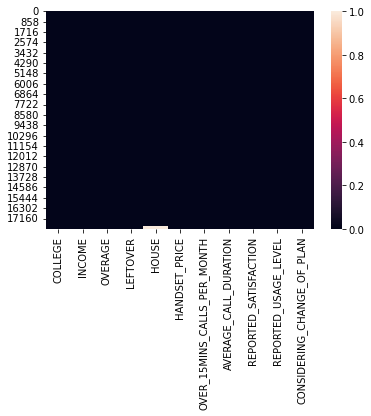

In [171]:
sns.heatmap(x.isna())
plt.show()

In [172]:
my_data = x.copy()
my_data.isna().sum()

COLLEGE                          0
INCOME                           0
OVERAGE                          0
LEFTOVER                         0
HOUSE                          215
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION           38
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
dtype: int64

In [173]:
my_data['HOUSE'] = my_data['HOUSE'].fillna(my_data['HOUSE'].mode()[0])
my_data.isna().sum()

COLLEGE                         0
INCOME                          0
OVERAGE                         0
LEFTOVER                        0
HOUSE                           0
HANDSET_PRICE                   0
OVER_15MINS_CALLS_PER_MONTH     0
AVERAGE_CALL_DURATION           0
REPORTED_SATISFACTION          38
REPORTED_USAGE_LEVEL            0
CONSIDERING_CHANGE_OF_PLAN      0
dtype: int64

In [174]:
my_data.dropna(axis=0)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,1,47711,183,17,730589.0,192,19,5,unsat,little,considering
1,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no
2,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering
3,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought
4,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no
...,...,...,...,...,...,...,...,...,...,...,...
17995,0,31079,200,40,169357.0,181,20,11,unsat,little,actively_looking_into_it
17996,0,137194,63,0,169357.0,787,3,11,very_unsat,little,no
17997,0,82931,0,77,169357.0,232,0,2,very_unsat,very_little,never_thought
17998,0,124391,0,19,169357.0,862,0,2,unsat,very_high,no


### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [187]:
my_data = pd.get_dummies(my_data, columns=['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN'], drop_first=True)

In [188]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   COLLEGE                                   18000 non-null  int64  
 1   INCOME                                    18000 non-null  int64  
 2   OVERAGE                                   18000 non-null  int64  
 3   LEFTOVER                                  18000 non-null  int64  
 4   HOUSE                                     18000 non-null  float64
 5   HANDSET_PRICE                             18000 non-null  int64  
 6   OVER_15MINS_CALLS_PER_MONTH               18000 non-null  int64  
 7   AVERAGE_CALL_DURATION                     18000 non-null  int64  
 8   REPORTED_SATISFACTION_sat                 18000 non-null  uint8  
 9   REPORTED_SATISFACTION_unsat               18000 non-null  uint8  
 10  REPORTED_SATISFACTION_very_sat    

### 2.4 스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [193]:
my_data.describe()


,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,0.502722,80314.400278,86.014833,23.995500,489085.387722,390.096667,8.012778,5.990944,0.051778,0.199444,0.253444,0.392889,0.100667,0.393111,0.257556,0.199667,0.396722,0.100222,0.202444,0.053222
std,0.500006,41703.420130,85.963981,26.860363,253117.692489,214.239639,8.932820,4.398894,0.221584,0.399594,0.434995,0.488406,0.300895,0.488455,0.437300,0.399761,0.489231,0.300304,0.401833,0.224483
min,0.000000,20007.000000,-2.000000,0.000000,150015.000000,130.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42151.500000,0.000000,0.000000,259092.500000,219.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,75501.500000,59.000000,14.500000,446412.000000,326.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,116082.250000,179.000000,42.000000,698473.500000,536.000000,15.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,159983.000000,335.000000,89.000000,999970.000000,899.000000,29.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
my_numerical = my_data.iloc[:, 1:8]
my_numerical.head(1)

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
0,47711,183,17,730589.0,192,19,5


In [198]:
my_list = list(my_numerical)
my_list

['INCOME',
 'OVERAGE',
 'LEFTOVER',
 'HOUSE',
 'HANDSET_PRICE',
 'OVER_15MINS_CALLS_PER_MONTH',
 'AVERAGE_CALL_DURATION']

In [201]:
mm_scaler = MinMaxScaler()

my_category = my_data.drop(my_list, axis=1)
my_category.head()

,COLLEGE,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,1,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,1,0,0,1,0
2,1,0,1,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,1,0,0
4,1,0,1,0,0,0,0,0,1,0,0,1,0


In [202]:
my_numerical = mm_scaler.fit_transform(my_numerical)

In [206]:
df_numerical = pd.DataFrame(my_numerical, columns=my_list)

In [210]:
result = pd.concat([df_numerical, my_category], axis=1)
result.describe()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,COLLEGE,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,0.430841,0.261172,0.269612,0.398927,0.338227,0.276303,0.356496,0.502722,0.051778,0.199444,0.253444,0.392889,0.100667,0.393111,0.257556,0.199667,0.396722,0.100222,0.202444,0.053222
std,0.297933,0.255086,0.301802,0.297801,0.278595,0.308028,0.314207,0.500006,0.221584,0.399594,0.434995,0.488406,0.300895,0.488455,0.437300,0.399761,0.489231,0.300304,0.401833,0.224483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158202,0.005935,0.000000,0.128333,0.115735,0.034483,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.396457,0.181009,0.162921,0.348721,0.254876,0.137931,0.285714,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.686369,0.537092,0.471910,0.645279,0.527958,0.517241,0.642857,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
